In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df2 = pd.read_csv('C:\\Users\\ispamr\\Downloads\\house_prices_data_training_data.csv', sep=',', header=None)
df2.describe()
df2.dropna(inplace=True)
df2 = df2.drop(0)
df2 = df2.drop(0, axis = 1)
df2 = df2.drop(1, axis = 1)

df2 = df2.convert_dtypes() 

df2.apply(pd.to_numeric).dtypes                                             
df2 = df2.astype(float)

In [2]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [3]:
# for column in df2.columns:
#   df2[column] = df2[column].as_type(float)
X_norm, mu, sigma = feature_normalize(df2)
print('Computed mean:', mu)
print('Computed standard deviation:', sigma)
# X_norm

Computed mean: [ 5.33074250e+05  3.36296461e+00  2.06160064e+00  2.05182232e+03
  1.57587327e+04  1.43316295e+00  7.83376854e-03  2.42457914e-01
  3.44852492e+00  7.59236624e+00  1.74974232e+03  3.02080004e+02
  1.96728235e+03  9.02535141e+01  9.80780698e+04  4.75602109e+01
 -1.22215112e+02  1.97323674e+03  1.32822707e+04]
Computed standard deviation: [3.64412151e+05 9.34032388e-01 7.58632316e-01 9.02744154e+02
 4.24551425e+04 5.09662990e-01 8.81636686e-02 7.78856958e-01
 6.67039405e-01 1.16949482e+00 8.05427363e+02 4.49443008e+02
 2.79403058e+01 4.14717703e+02 5.41249245e+01 1.39644240e-01
 1.39135290e-01 6.73186870e+02 2.73524150e+04]


In [4]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

In [5]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0] 
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

In [6]:
m = df2.shape[0]
# X = df2.iloc[:, 3:].values
# X = df2.iloc[:, 3:].astype(float)
# y = df2.iloc[:, 2].astype(float)
# X = np.hstack((np.ones((m,1)),X_norm))
X = np.hstack((np.ones((m,1)),X_norm))

y = np.array(df2.iloc[:, 2].astype(float).values).reshape(-1,1)
# y = df2.iloc[:, 2].values
theta = np.zeros(shape=(X.shape[1],1))

In [7]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50
X.shape

(17999, 20)

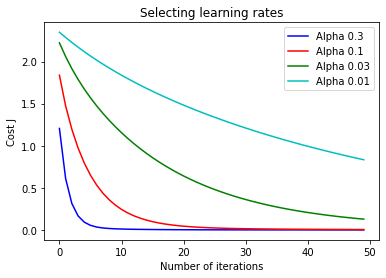

In [8]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

In [9]:
iterations = 250
alpha = 0.1
theta, _ = gradient_descent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)

Theta found by gradient descent:
[[ 2.06160064e+00]
 [ 4.36136659e-04]
 [ 1.13119183e-04]
 [ 7.56835903e-01]
 [ 7.76800922e-04]
 [ 4.49622710e-05]
 [ 3.19657425e-04]
 [-1.31744205e-04]
 [ 4.01519841e-05]
 [ 2.08771402e-04]
 [-7.58462619e-04]
 [ 6.20533146e-04]
 [ 4.48239515e-04]
 [ 1.14614056e-03]
 [ 2.75714826e-04]
 [ 1.13547466e-06]
 [ 6.31015720e-05]
 [-2.28917121e-04]
 [-3.13946836e-04]
 [-9.39177481e-05]]


In [10]:


bedrooms = (5, - mu[0]/sigma[0])
bathrooms = (3, - mu[1]/sigma[1])
sqft_living = (1150, mu[2]/sigma[2])
sqft_lot = (7450, mu[3]/sigma[3])
floors = (2, mu[4]/sigma[4])
waterfront = (0, mu[5]/sigma[5])
view = (2, mu[6]/sigma[6])
condition = (2, mu[7]/sigma[7])
grade = (10, mu[8]/sigma[8])
sqft_above = (2000, mu[9]/sigma[9])
sqft_basement = (430, mu[10]/sigma[10])
yr_built = (2009, mu[11]/sigma[11])
yr_renovated = (1000, mu[12]/sigma[12])
zipcode = (9813, mu[13]/sigma[13])
lat = (47.6370, mu[14]/sigma[14])
long_ = (-122.250, mu[15]/sigma[15])
sqft_living15 = (1410, mu[16]/sigma[16])
sqft_lot15 = (8750, mu[17]/sigma[17])

y_pred = theta[0] + theta[1]*bedrooms + theta[2]*bathrooms + theta[3]*sqft_living + theta[4]*sqft_lot + theta[5]*floors + theta[6]*waterfront + theta[7]*view + theta[8]*condition + theta[9]*grade + theta[10]*sqft_above + theta[11]*sqft_basement + theta[12]*yr_built + theta[13]*yr_renovated + theta[14]*zipcode + theta[15]*lat + theta[16]*long_ + theta[17]*sqft_living15 + theta[18]*sqft_lot15
f'Price of a house with 1650 square feet and 3 bedrooms: {y_pred[0]}$'

'Price of a house with 1650 square feet and 3 bedrooms: 878.6392500305343$'

In [11]:
def normal_eqn(X, y):
    inv = np.linalg.pinv(X.T.dot(X))
    theta = inv.dot(X.T).dot(y)
    return theta

In [12]:
Xe = np.hstack((np.ones((m,1)),X_norm))
theta_e = normal_eqn(Xe, y)
theta_e

array([[ 2.06160064e+00],
       [-1.87350135e-16],
       [ 8.67361738e-17],
       [ 7.58632316e-01],
       [ 3.81639165e-16],
       [ 3.33066907e-16],
       [ 1.49272955e-15],
       [ 7.28583860e-17],
       [-3.00107161e-16],
       [ 3.94649591e-16],
       [-9.36750677e-17],
       [ 7.84095011e-16],
       [ 1.12843762e-15],
       [ 7.45931095e-17],
       [ 3.77302356e-16],
       [ 2.05564732e-16],
       [ 4.46691295e-16],
       [-1.78676518e-16],
       [ 5.27355937e-16],
       [-3.27429056e-16]])

In [13]:
 
 
bedrooms = (5, - mu[0]/sigma[0])
bathrooms = (3, - mu[1]/sigma[1])
sqft_living = (1150, mu[2]/sigma[2])
sqft_lot = (7450, mu[3]/sigma[3])
floors = (2, mu[4]/sigma[4])
waterfront = (0, mu[5]/sigma[5])
view = (2, mu[6]/sigma[6])
condition = (2, mu[7]/sigma[7])
grade = (10, mu[8]/sigma[8])
sqft_above = (2000, mu[9]/sigma[9])
sqft_basement = (430, mu[10]/sigma[10])
yr_built = (2009, mu[11]/sigma[11])
yr_renovated = (1000, mu[12]/sigma[12])
zipcode = (9813, mu[13]/sigma[13])
lat = (47.6370, mu[14]/sigma[14])
long_ = (-122.250, mu[15]/sigma[15])
sqft_living15 = (1410, mu[16]/sigma[16])
sqft_lot15 = (8750, mu[17]/sigma[17])
 
y_pred = theta_e[0] + theta_e[1]*bedrooms + theta_e[2]*bathrooms + theta_e[3]*sqft_living + theta_e[4]*sqft_lot + theta_e[5]*floors + theta_e[6]*waterfront + theta_e[7]*view + theta_e[8]*condition + theta_e[9]*grade + theta_e[10]*sqft_above + theta_e[11]*sqft_basement + theta_e[12]*yr_built + theta_e[13]*yr_renovated + theta_e[14]*zipcode + theta_e[15]*lat + theta_e[16]*long_ + theta_e[17]*sqft_living15 + theta_e[18]*sqft_lot15
f'Price of a house with 1650 square feet and 3 bedrooms: {y_pred[0]}$'

'Price of a house with 1650 square feet and 3 bedrooms: 874.4887638584737$'

In [14]:
X.shape

(17999, 20)

In [15]:
dataset = pd.read_csv('C://Users/ispamr//Downloads//house_prices_data_training_data.csv')
dataset.dropna(inplace=True)
X = dataset.iloc[:, 3:].values
y = dataset.iloc[:, 2].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
# #Implementing cross validation
# from sklearn.model_selection import KFold 
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LinearRegression

# k = 5
# kf = KFold(n_splits=k, random_state=None)
# model = LinearRegression()

# acc_score = []

# for train_index , test_index in kf.split(X):
#     X_train , X_test = X[train_index,:],X[test_index,:]
#     y_train , y_test = y[train_index] , y[test_index]
    
#     model.fit(X_train,y_train)
#     y_pred = model.predict(X_test)
#     acc = r2_score(y_test, y_pred)
#     acc_score.append(acc)

    
# avg_acc_score = sum(acc_score)/k

# print('accuracy of each fold - {}'.format(acc_score))
# print('Avg accuracy : {}'.format(avg_acc_score))

# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator=model,X = X_train,y=y_train,cv=10)
# accuracies.mean()
# accuracies.std()


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df2 = pd.read_csv('C:\\Users\\ispamr\\Downloads\\house_prices_data_training_data.csv', sep=',')
df2.describe()
df2.dropna(inplace=True)
df2 = df2.drop(columns='id', axis = 1)
df2 = df2.drop(columns='date', axis = 1)

df2 = df2.convert_dtypes() 

# df2.apply(pd.to_numeric).dtypes                                             
df2 = df2.astype(float)
df2.shape
df2.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [18]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [19]:
y = df2.iloc[:, 1]
X = df2.iloc[:, 2:]
X["bathrooms1"] = X["bathrooms"]**2
X["floors1"] = X["floors"]**3
X["sqft_living1"] = X["sqft_living"]**2
X["sqft_living2"] = X["sqft_living"]**3
X["sqft_living3"] = X["sqft_living"]**4
X["sqft_lot1"] = X["sqft_lot"]**(1/2)
X["condition1"] = X["condition"]**2
X["condition2"] = X["condition"]**3
X.head()

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,sqft_living15,sqft_lot15,bathrooms1,floors1,sqft_living1,sqft_living2,sqft_living3,sqft_lot1,condition1,condition2
0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,...,1340.0,5650.0,1.0000,1.0,1392400.0,1.643032e+09,1.938778e+12,75.166482,9.0,27.0
1,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,...,1690.0,7639.0,5.0625,8.0,6604900.0,1.697459e+10,4.362470e+13,85.099941,9.0,27.0
2,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,...,2720.0,8062.0,1.0000,1.0,592900.0,4.565330e+08,3.515304e+11,100.000000,9.0,27.0
3,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,...,1360.0,5000.0,9.0000,1.0,3841600.0,7.529536e+09,1.475789e+13,70.710678,25.0,125.0
4,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,...,1800.0,7503.0,4.0000,1.0,2822400.0,4.741632e+09,7.965942e+12,89.888820,9.0,27.0


In [20]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [21]:
# for column in df2.columns:
#   df2[column] = df2[column].as_type(float)
X_norm, mu, sigma = feature_normalize(df2)
print('Computed mean:', mu)
print('Computed standard deviation:', sigma)
# X_norm

Computed mean: [ 5.33074250e+05  3.36296461e+00  2.06160064e+00  2.05182232e+03
  1.57587327e+04  1.43316295e+00  7.83376854e-03  2.42457914e-01
  3.44852492e+00  7.59236624e+00  1.74974232e+03  3.02080004e+02
  1.96728235e+03  9.02535141e+01  9.80780698e+04  4.75602109e+01
 -1.22215112e+02  1.97323674e+03  1.32822707e+04]
Computed standard deviation: [3.64412151e+05 9.34032388e-01 7.58632316e-01 9.02744154e+02
 4.24551425e+04 5.09662990e-01 8.81636686e-02 7.78856958e-01
 6.67039405e-01 1.16949482e+00 8.05427363e+02 4.49443008e+02
 2.79403058e+01 4.14717703e+02 5.41249245e+01 1.39644240e-01
 1.39135290e-01 6.73186870e+02 2.73524150e+04]


In [22]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0] 
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

In [23]:
m = df2.shape[0]
# X = df2.iloc[:, 3:].values
# X = df2.iloc[:, 3:].astype(float)
# y = df2.iloc[:, 2].astype(float)
# X = np.hstack((np.ones((m,1)),X_norm))
X = np.hstack((np.ones((m,1)),X_norm))

y = np.array(df2.iloc[:, 2].astype(float).values).reshape(-1,1)
# y = df2.iloc[:, 2].values
theta = np.zeros(shape=(X.shape[1],1))

In [24]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50
X.shape

(17999, 20)

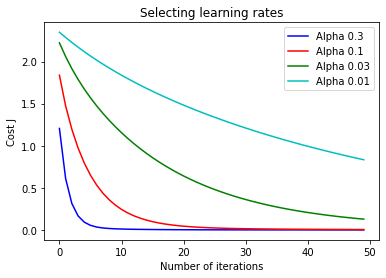

In [25]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

In [26]:
iterations = 250
alpha = 0.1
theta, _ = gradient_descent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)

Theta found by gradient descent:
[[ 2.06160064e+00]
 [ 4.36136659e-04]
 [ 1.13119183e-04]
 [ 7.56835903e-01]
 [ 7.76800922e-04]
 [ 4.49622710e-05]
 [ 3.19657425e-04]
 [-1.31744205e-04]
 [ 4.01519841e-05]
 [ 2.08771402e-04]
 [-7.58462619e-04]
 [ 6.20533146e-04]
 [ 4.48239515e-04]
 [ 1.14614056e-03]
 [ 2.75714826e-04]
 [ 1.13547466e-06]
 [ 6.31015720e-05]
 [-2.28917121e-04]
 [-3.13946836e-04]
 [-9.39177481e-05]]


In [27]:
df = pd.read_csv('C:\\Users\\ispamr\\Downloads\\house_prices_data_training_data.csv', sep=',')

def split_train_valid_test(data,valid_ratio,test_ratio):
    shuffled_indcies=np.random.permutation(len(data))
    valid_set_size= int(len(data)*valid_ratio)
    valid_indcies=shuffled_indcies[:valid_set_size]
    test_set_size= int(len(data)*test_ratio)
    test_indcies=shuffled_indcies[valid_set_size:test_set_size+valid_set_size]
    train_indices=shuffled_indcies[test_set_size:]
    return data.iloc[train_indices],data.iloc[valid_indcies],data.iloc[test_indcies]

train_set,valid_set,test_set=split_train_valid_test(df2,valid_ratio=0.2,test_ratio=0.2)
print(len(train_set),len(valid_set),len(test_set))
##out: (16512, 4128, 4128)

14400 3599 3599


In [28]:
y = train_set.iloc[:, 1]
X = train_set.iloc[:, 2:]
X["bathrooms1"] = X["bathrooms"]**2
X["floors1"] = X["floors"]**3
X["sqft_living1"] = X["sqft_living"]**2
X["sqft_living2"] = X["sqft_living"]**3
X["sqft_living3"] = X["sqft_living"]**4
X["sqft_lot1"] = X["sqft_lot"]**(1/2)
X["condition1"] = X["condition"]**2
X["condition2"] = X["condition"]**3
X.head()

<ipython-input-28-a599b082d4e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["bathrooms1"] = X["bathrooms"]**2


,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,sqft_living15,sqft_lot15,bathrooms1,floors1,sqft_living1,sqft_living2,sqft_living3,sqft_lot1,condition1,condition2
10639,2.50,3030.0,180263.0,2.0,0.0,0.0,3.0,7.0,2030.0,1000.0,...,2600.0,182509.0,6.2500,8.0,9180900.0,2.781813e+10,8.428892e+13,424.573904,9.0,27.0
8870,2.00,1950.0,3757.0,1.0,0.0,0.0,4.0,6.0,1160.0,790.0,...,1720.0,3757.0,4.0000,1.0,3802500.0,7.414875e+09,1.445901e+13,61.294372,16.0,64.0
2408,3.50,2880.0,11340.0,1.0,0.0,0.0,3.0,8.0,1690.0,1190.0,...,2530.0,11340.0,12.2500,1.0,8294400.0,2.388787e+10,6.879707e+13,106.489436,9.0,27.0
6288,2.75,2060.0,7350.0,1.0,0.0,0.0,3.0,7.0,1210.0,850.0,...,1940.0,7420.0,7.5625,1.0,4243600.0,8.741816e+09,1.800814e+13,85.732141,9.0,27.0
11173,2.50,2010.0,14298.0,2.0,0.0,0.0,3.0,7.0,2010.0,0.0,...,2010.0,14298.0,6.2500,8.0,4040100.0,8.120601e+09,1.632241e+13,119.574245,9.0,27.0


In [29]:
# for column in df2.columns:
#   df2[column] = df2[column].as_type(float)
X_norm, mu, sigma = feature_normalize(df2)
print('Computed mean:', mu)
print('Computed standard deviation:', sigma)
# X_norm

Computed mean: [ 5.33074250e+05  3.36296461e+00  2.06160064e+00  2.05182232e+03
  1.57587327e+04  1.43316295e+00  7.83376854e-03  2.42457914e-01
  3.44852492e+00  7.59236624e+00  1.74974232e+03  3.02080004e+02
  1.96728235e+03  9.02535141e+01  9.80780698e+04  4.75602109e+01
 -1.22215112e+02  1.97323674e+03  1.32822707e+04]
Computed standard deviation: [3.64412151e+05 9.34032388e-01 7.58632316e-01 9.02744154e+02
 4.24551425e+04 5.09662990e-01 8.81636686e-02 7.78856958e-01
 6.67039405e-01 1.16949482e+00 8.05427363e+02 4.49443008e+02
 2.79403058e+01 4.14717703e+02 5.41249245e+01 1.39644240e-01
 1.39135290e-01 6.73186870e+02 2.73524150e+04]


In [30]:
m = df2.shape[0]
# X = df2.iloc[:, 3:].values
# X = df2.iloc[:, 3:].astype(float)
# y = df2.iloc[:, 2].astype(float)
# X = np.hstack((np.ones((m,1)),X_norm))
X = np.hstack((np.ones((m,1)),X_norm))

y = np.array(df2.iloc[:, 2].astype(float).values).reshape(-1,1)
# y = df2.iloc[:, 2].values
theta = np.zeros(shape=(X.shape[1],1))

In [31]:
m = df2.shape[0]
# X = df2.iloc[:, 3:].values
# X = df2.iloc[:, 3:].astype(float)
# y = df2.iloc[:, 2].astype(float)
# X = np.hstack((np.ones((m,1)),X_norm))
X = np.hstack((np.ones((m,1)),X_norm))

y = np.array(df2.iloc[:, 2].astype(float).values).reshape(-1,1)
# y = df2.iloc[:, 2].values
theta = np.zeros(shape=(X.shape[1],1))

In [32]:
# for column in df2.columns:
#   df2[column] = df2[column].as_type(float)
X_norm, mu, sigma = feature_normalize(df2)
print('Computed mean:', mu)
print('Computed standard deviation:', sigma)
# X_norm
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50
X.shape

Computed mean: [ 5.33074250e+05  3.36296461e+00  2.06160064e+00  2.05182232e+03
  1.57587327e+04  1.43316295e+00  7.83376854e-03  2.42457914e-01
  3.44852492e+00  7.59236624e+00  1.74974232e+03  3.02080004e+02
  1.96728235e+03  9.02535141e+01  9.80780698e+04  4.75602109e+01
 -1.22215112e+02  1.97323674e+03  1.32822707e+04]
Computed standard deviation: [3.64412151e+05 9.34032388e-01 7.58632316e-01 9.02744154e+02
 4.24551425e+04 5.09662990e-01 8.81636686e-02 7.78856958e-01
 6.67039405e-01 1.16949482e+00 8.05427363e+02 4.49443008e+02
 2.79403058e+01 4.14717703e+02 5.41249245e+01 1.39644240e-01
 1.39135290e-01 6.73186870e+02 2.73524150e+04]


(17999, 20)

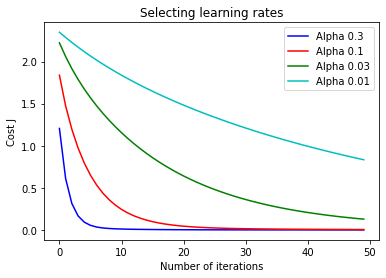

In [33]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

In [34]:
test_set.dropna(inplace=True)
test_set.head()
# test_set = test_set.drop(columns='id')
# test_set = test_set.drop(columns='date')
y_org = test_set.iloc[:, 2]
# test_set = test_set.drop(columns='price')


<ipython-input-34-61ba6f401955>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.dropna(inplace=True)


In [35]:
iterations = 250
alpha = 0.1
theta, _ = gradient_descent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:')


Theta found by gradient descent:
(20, 1)
(3599, 19)
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10639,400000.0,4.0,2.50,3030.0,180263.0,2.0,0.0,0.0,3.0,7.0,2030.0,1000.0,1987.0,0.0,98092.0,47.2953,-122.097,2600.0,182509.0
8870,370000.0,4.0,2.00,1950.0,3757.0,1.0,0.0,0.0,4.0,6.0,1160.0,790.0,1908.0,0.0,98118.0,47.5372,-122.269,1720.0,3757.0
2408,1020000.0,3.0,3.50,2880.0,11340.0,1.0,0.0,0.0,3.0,8.0,1690.0,1190.0,1980.0,2013.0,98074.0,47.6113,-122.058,2530.0,11340.0
6288,275000.0,4.0,2.75,2060.0,7350.0,1.0,0.0,0.0,3.0,7.0,1210.0,850.0,1978.0,0.0,98001.0,47.3424,-122.275,1940.0,7420.0
11173,350000.0,3.0,2.50,2010.0,14298.0,2.0,0.0,0.0,3.0,7.0,2010.0,0.0,1977.0,0.0,98070.0,47.5069,-122.472,2010.0,14298.0
